In [10]:
pip install tensorflow==2.2.0

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=f0b809f55ee975f558833342225dbd0efa1e2f0ba7db26c8643c2085d04735bc
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.0
    Uninstalling scipy-1.5.0:
      Successfully uninstalled scipy-1.5.0
Note: you may need to restart the kernel to use updated packages.


ERROR: phik 0.11.1 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [11]:
pip install Keras==2.2.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy
import pandas

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
dataframe = pandas.read_csv("forestfires.csv")

In [4]:
# Encode Data
dataframe.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataframe.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)


In [5]:
print("Head:",dataframe.head())

Head:    month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0     

In [6]:
print("Statistical Description:", dataframe.describe())


Statistical Description:             month         day        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     7.475822    4.259188   90.644681  110.872340  547.940039    9.021663   
std      2.275990    2.072929    5.520111   64.046482  248.066192    4.559477   
min      1.000000    1.000000   18.700000    1.100000    7.900000    0.000000   
25%      7.000000    2.000000   90.200000   68.600000  437.700000    6.500000   
50%      8.000000    5.000000   91.600000  108.300000  664.200000    8.400000   
75%      9.000000    6.000000   92.900000  142.400000  713.900000   10.800000   
max     12.000000    7.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain  ...    monthdec  \
count  517.000000  517.000000  517.000000  517.000000  ...  517.000000   
mean    18.889168   44.288201    4.017602    0.021663  ...    0.017408   
std      5.806625   16.

In [7]:
print("Shape:", dataframe.shape)

Shape: (517, 31)


In [8]:
print("Data Types:", dataframe.dtypes)

Data Types: month              int64
day                int64
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object


In [9]:
print("Correlation:", dataframe.corr(method='pearson'))

Correlation:              month       day      FFMC       DMC        DC       ISI  \
month     1.000000 -0.050837  0.291477  0.466645  0.868698  0.186597   
day      -0.050837  1.000000 -0.041068  0.062870  0.000105  0.032909   
FFMC      0.291477 -0.041068  1.000000  0.382619  0.330512  0.531805   
DMC       0.466645  0.062870  0.382619  1.000000  0.682192  0.305128   
DC        0.868698  0.000105  0.330512  0.682192  1.000000  0.229154   
ISI       0.186597  0.032909  0.531805  0.305128  0.229154  1.000000   
temp      0.368842  0.052190  0.431532  0.469594  0.496208  0.394287   
RH       -0.095280  0.092151 -0.300995  0.073795 -0.039192 -0.132517   
wind     -0.086368  0.032478 -0.028485 -0.105342 -0.203466  0.106826   
rain      0.013438 -0.048340  0.056702  0.074790  0.035861  0.067668   
area      0.056496  0.023226  0.040122  0.072994  0.049383  0.008258   
dayfri   -0.028562  0.158676  0.019306 -0.012010 -0.004220  0.046695   
daymon   -0.002941 -0.643220 -0.059396 -0.107921 -0

'temp' has the highest correlation with the area of forest fire(which is a positive correlation), followed by 'RH' also a positive correlation, 'Rain' has the least correlation

In [10]:
label_encoder = preprocessing.LabelEncoder()
dataframe['size_category']= label_encoder.fit_transform(dataframe['size_category'])

NameError: name 'preprocessing' is not defined

In [11]:
dataset = dataframe.values

X = dataset[:,0:12]
Y = dataset[:,12]

In [12]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False  True False False False False False False False False  True  True]
Feature Ranking:  [10  1  8  9  7  6  5  4  3  2  1  1]


'Wind', 'RH' and 'DMC' were top 3 selected features/feature combination for predicting 'Area' using Recursive Feature Elimination, the 2nd selected feature was atually one of the attributes with the highest correlation with the 'Area'

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <a list of 10 Patch objects>)

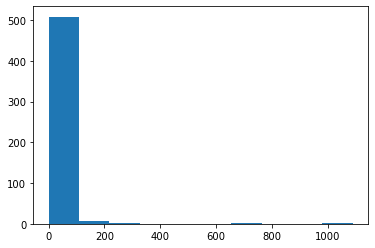

In [13]:
plt.hist((dataframe.area))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED77BD7B80>,
      dtype=object)

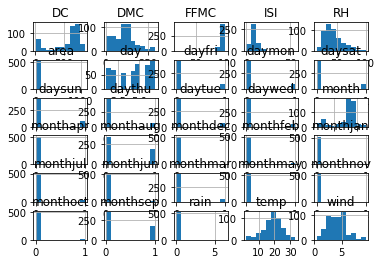

In [14]:
dataframe.hist()

Temp' has a near Guassian Distribution. There are a mixture of positive skews and negative skews among the other attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED784D1220>,
      dtype=object)

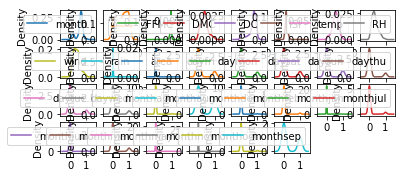

In [15]:
dataframe.plot(kind='density', subplots=True, layout=(6,8), sharex=False, sharey=False)

month          AxesSubplot(0.125,0.772143;0.110714x0.107857)
day         AxesSubplot(0.257857,0.772143;0.110714x0.107857)
FFMC        AxesSubplot(0.390714,0.772143;0.110714x0.107857)
DMC         AxesSubplot(0.523571,0.772143;0.110714x0.107857)
DC          AxesSubplot(0.656429,0.772143;0.110714x0.107857)
ISI         AxesSubplot(0.789286,0.772143;0.110714x0.107857)
temp           AxesSubplot(0.125,0.642714;0.110714x0.107857)
RH          AxesSubplot(0.257857,0.642714;0.110714x0.107857)
wind        AxesSubplot(0.390714,0.642714;0.110714x0.107857)
rain        AxesSubplot(0.523571,0.642714;0.110714x0.107857)
area        AxesSubplot(0.656429,0.642714;0.110714x0.107857)
dayfri      AxesSubplot(0.789286,0.642714;0.110714x0.107857)
daymon         AxesSubplot(0.125,0.513286;0.110714x0.107857)
daysat      AxesSubplot(0.257857,0.513286;0.110714x0.107857)
daysun      AxesSubplot(0.390714,0.513286;0.110714x0.107857)
daythu      AxesSubplot(0.523571,0.513286;0.110714x0.107857)
daytue      AxesSubplot(

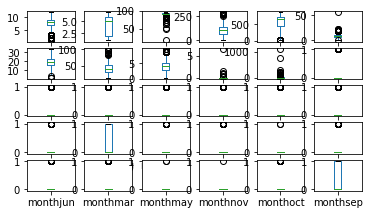

In [16]:
dataframe.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED7CFCCB80>,
      dtype=object)

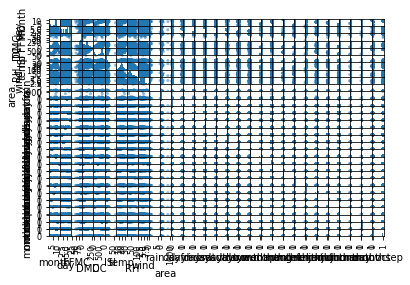

In [17]:
scatter_matrix(dataframe)

[Text(0, 0, 'month'),
 Text(0, 0, 'day'),
 Text(0, 0, 'FFMC'),
 Text(0, 0, 'DMC'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'ISI'),
 Text(0, 0, 'temp'),
 Text(0, 0, 'RH'),
 Text(0, 0, 'wind'),
 Text(0, 0, 'rain'),
 Text(0, 0, 'area'),
 Text(0, 0, 'dayfri'),
 Text(0, 0, 'daymon'),
 Text(0, 0, 'daysat'),
 Text(0, 0, 'daysun'),
 Text(0, 0, 'daythu'),
 Text(0, 0, 'daytue'),
 Text(0, 0, 'daywed'),
 Text(0, 0, 'monthapr'),
 Text(0, 0, 'monthaug'),
 Text(0, 0, 'monthdec'),
 Text(0, 0, 'monthfeb'),
 Text(0, 0, 'monthjan'),
 Text(0, 0, 'monthjul'),
 Text(0, 0, 'monthjun'),
 Text(0, 0, 'monthmar'),
 Text(0, 0, 'monthmay'),
 Text(0, 0, 'monthnov'),
 Text(0, 0, 'monthoct'),
 Text(0, 0, 'monthsep'),
 Text(0, 0, 'size_category')]

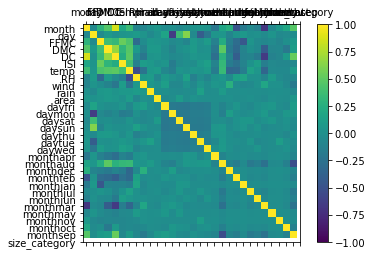

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,31,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataframe.columns)
ax.set_yticklabels(dataframe.columns)

In [19]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.447533 (0.201420)
Ridge: 0.447531 (0.201400)
Lasso: 0.009655 (0.243617)
ElasticNet: 0.011149 (0.243027)
Bag_Re: 1.000000 (0.000000)
RandomForest: 1.000000 (0.000000)
ExtraTreesRegressor: 1.000000 (0.000000)
KNN: 0.389358 (0.148549)
CART: 1.000000 (0.000000)
SVM: 0.007164 (0.213090)


'ExtraTreesRegressor' and 'DecisionTreeRegressor' are the best estimators/models for this dataset, followed by 'BaggingRegressor', ey can be further explored and their hyperparameters tuned

In [28]:
y = numpy.array(Y).reshape((len(Y), 1))
Y.reshape(1, -1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
Y = scaler.fit_transform(Y)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [21]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=12, kernel_initializer='uniform', activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(5, kernel_initializer='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    #model.add(Dropout(0.2))
    model.add(Dense(3, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
    
    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model




In [22]:

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=600, batch_size=5, verbose=0)

kfold = KFold(n_splits=30, random_state=seed)


NameError: name 'KerasRegressor' is not defined

In [23]:
import tensorflow as tf
tf_y = tf.convert_to_tensor(Y,dtype= tf.float32)
tf_X = tf.convert_to_tensor(X,dtype= tf.float32)

ModuleNotFoundError: No module named 'tensorflow'

In [24]:

results = cross_val_score(estimator, X, Y, cv=kfold)

print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

NameError: name 'cross_val_score' is not defined